In [2]:
!pip install transformers --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 56.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 67.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.39.3
    Uninstalling transformers-4.39.3:
      Successfully uninstalled transformers-4.39.3


# Imports

In [29]:
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt

# Code

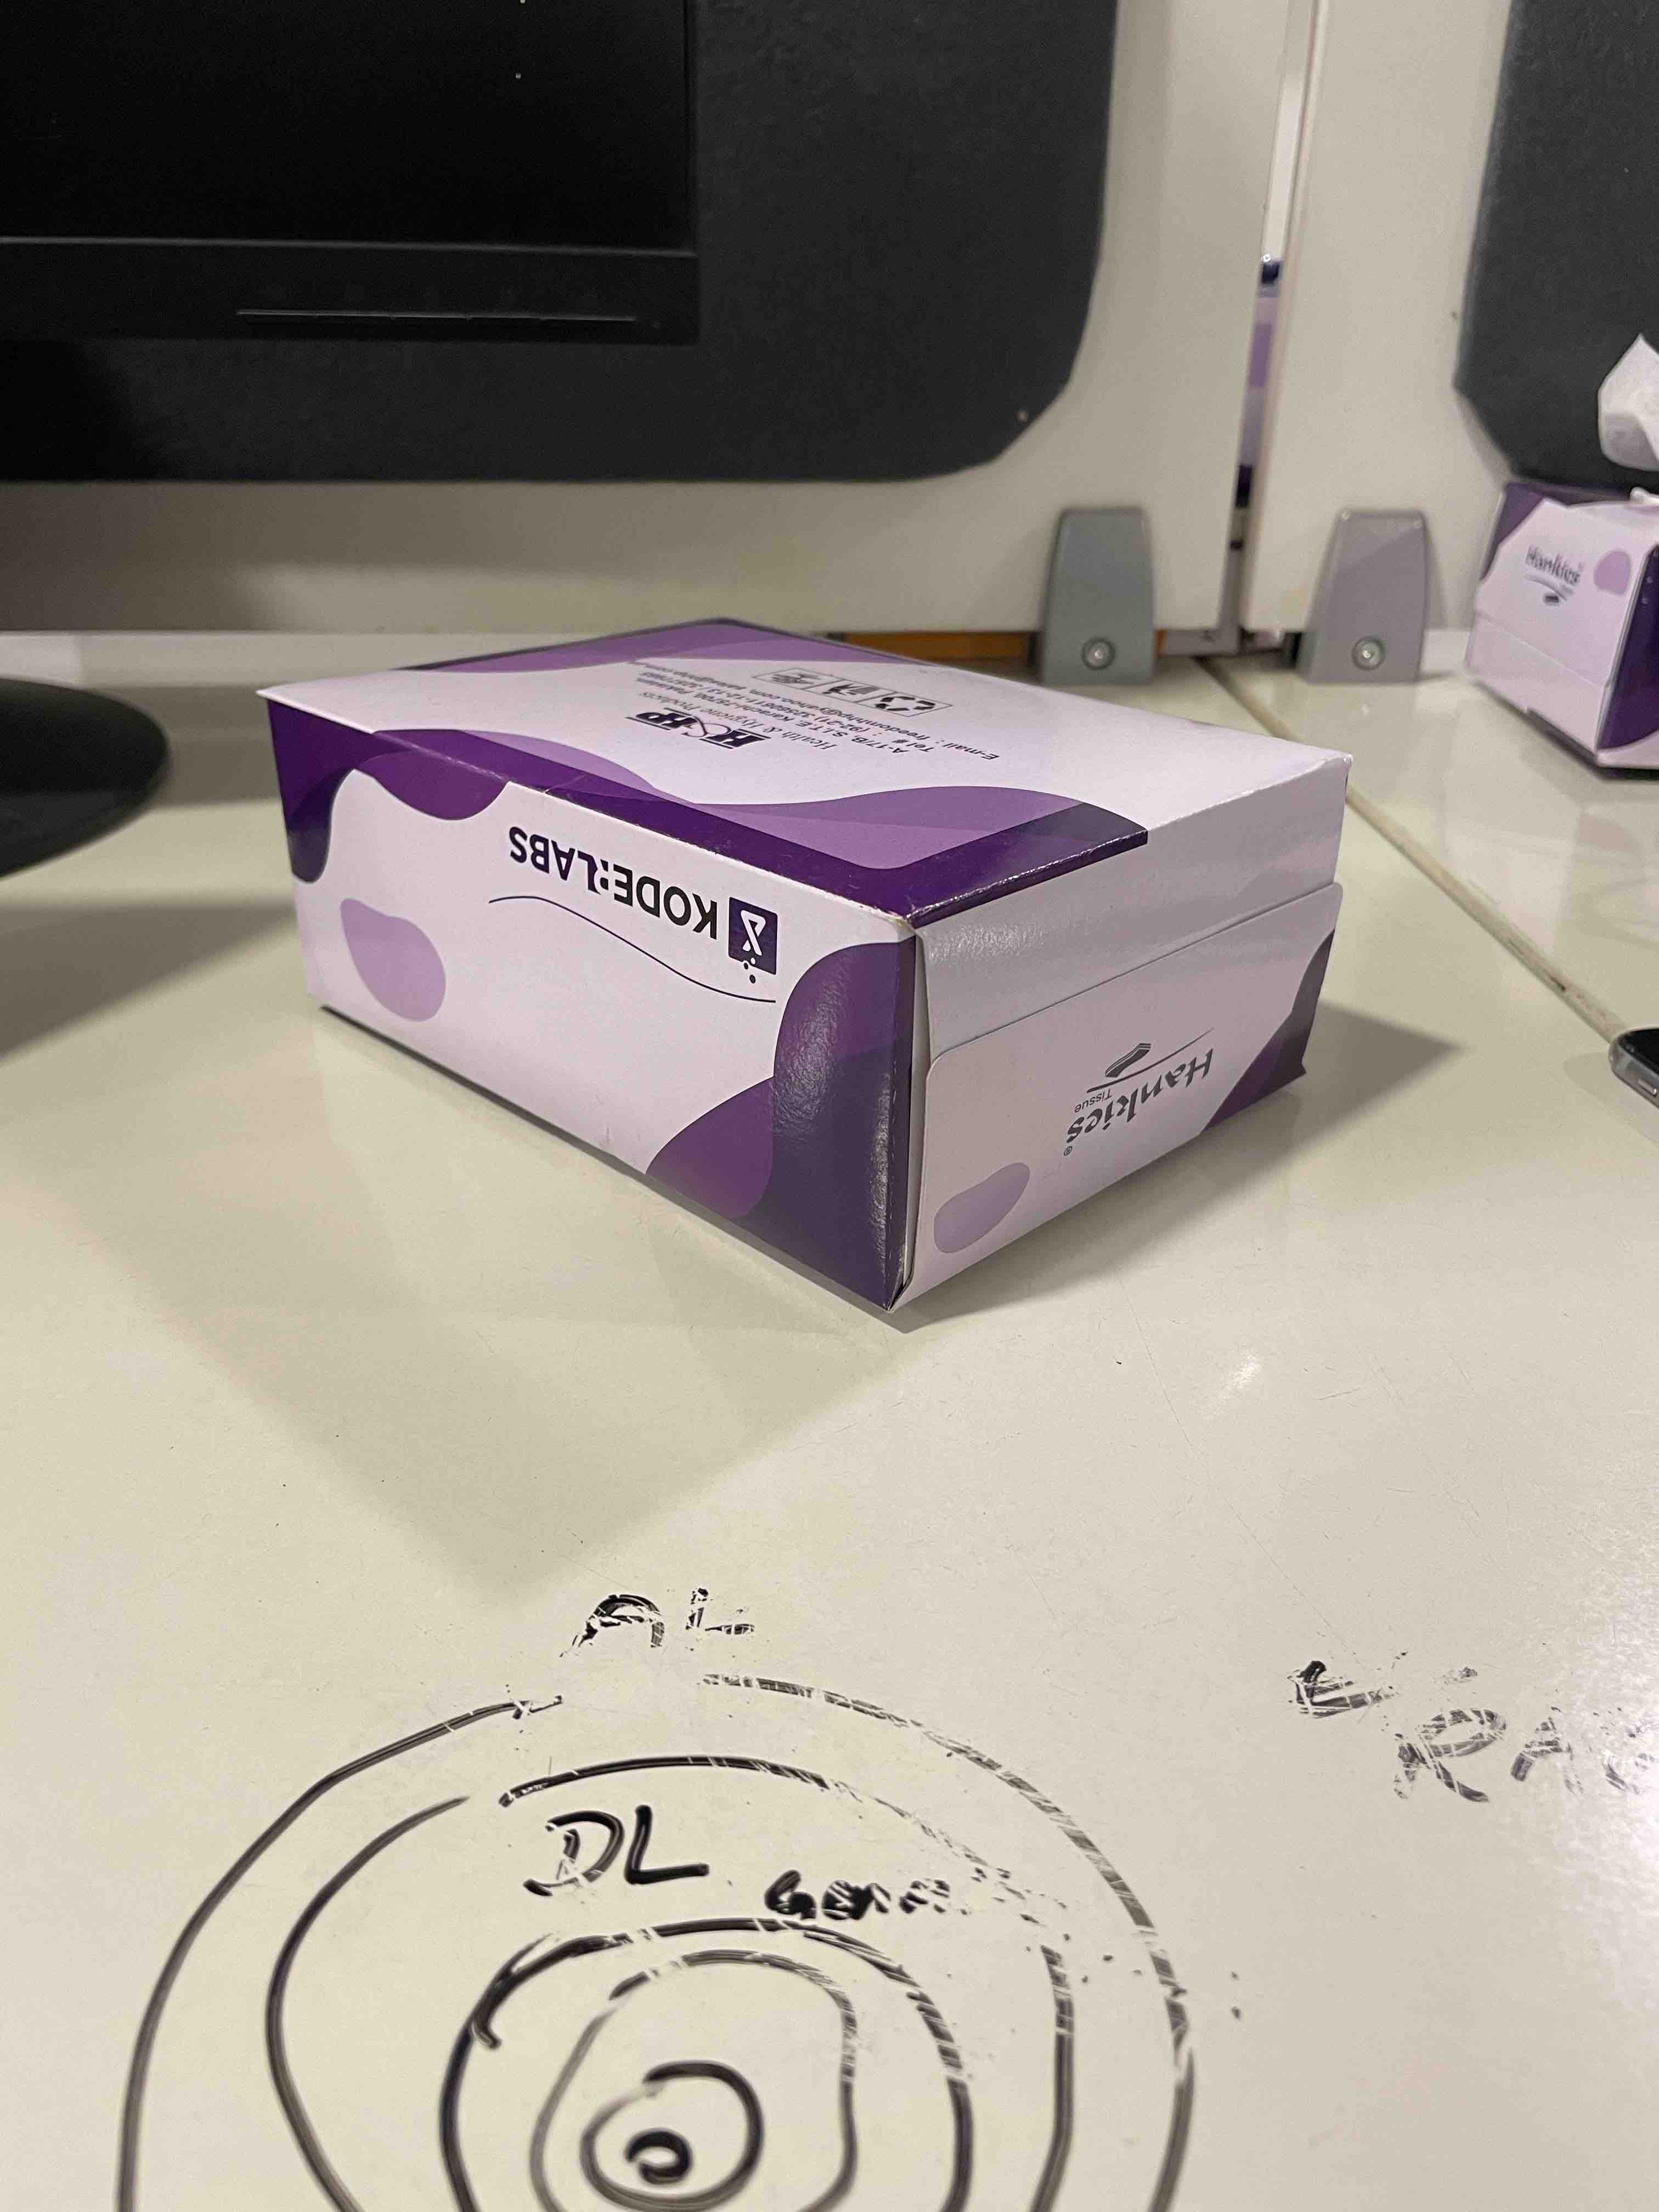

In [5]:
image = Image.open('/kaggle/input/key-images/IMG_3056.jpeg')
image

In [6]:
pipe_small = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-small-hf")

config.json:   0%|          | 0.00/954 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

In [7]:
output = pipe_small(image)
output

{'predicted_depth': tensor([[[ 9.1264,  9.1324,  9.0718,  ...,  4.4677,  4.4915,  3.4682],
          [ 8.7464,  9.0087,  9.1014,  ...,  4.4197,  4.3696,  4.5090],
          [ 8.9903,  9.0749,  9.1255,  ...,  4.4556,  4.4412,  4.5372],
          ...,
          [26.9560, 26.7577, 26.7515,  ..., 25.5108, 25.4911, 25.4893],
          [26.7907, 26.7102, 26.7569,  ..., 25.4155, 25.6042, 25.6355],
          [23.4196, 26.4575, 26.8474,  ..., 25.2538, 25.6353, 23.5457]]]),
 'depth': <PIL.Image.Image image mode=L size=3024x4032>}

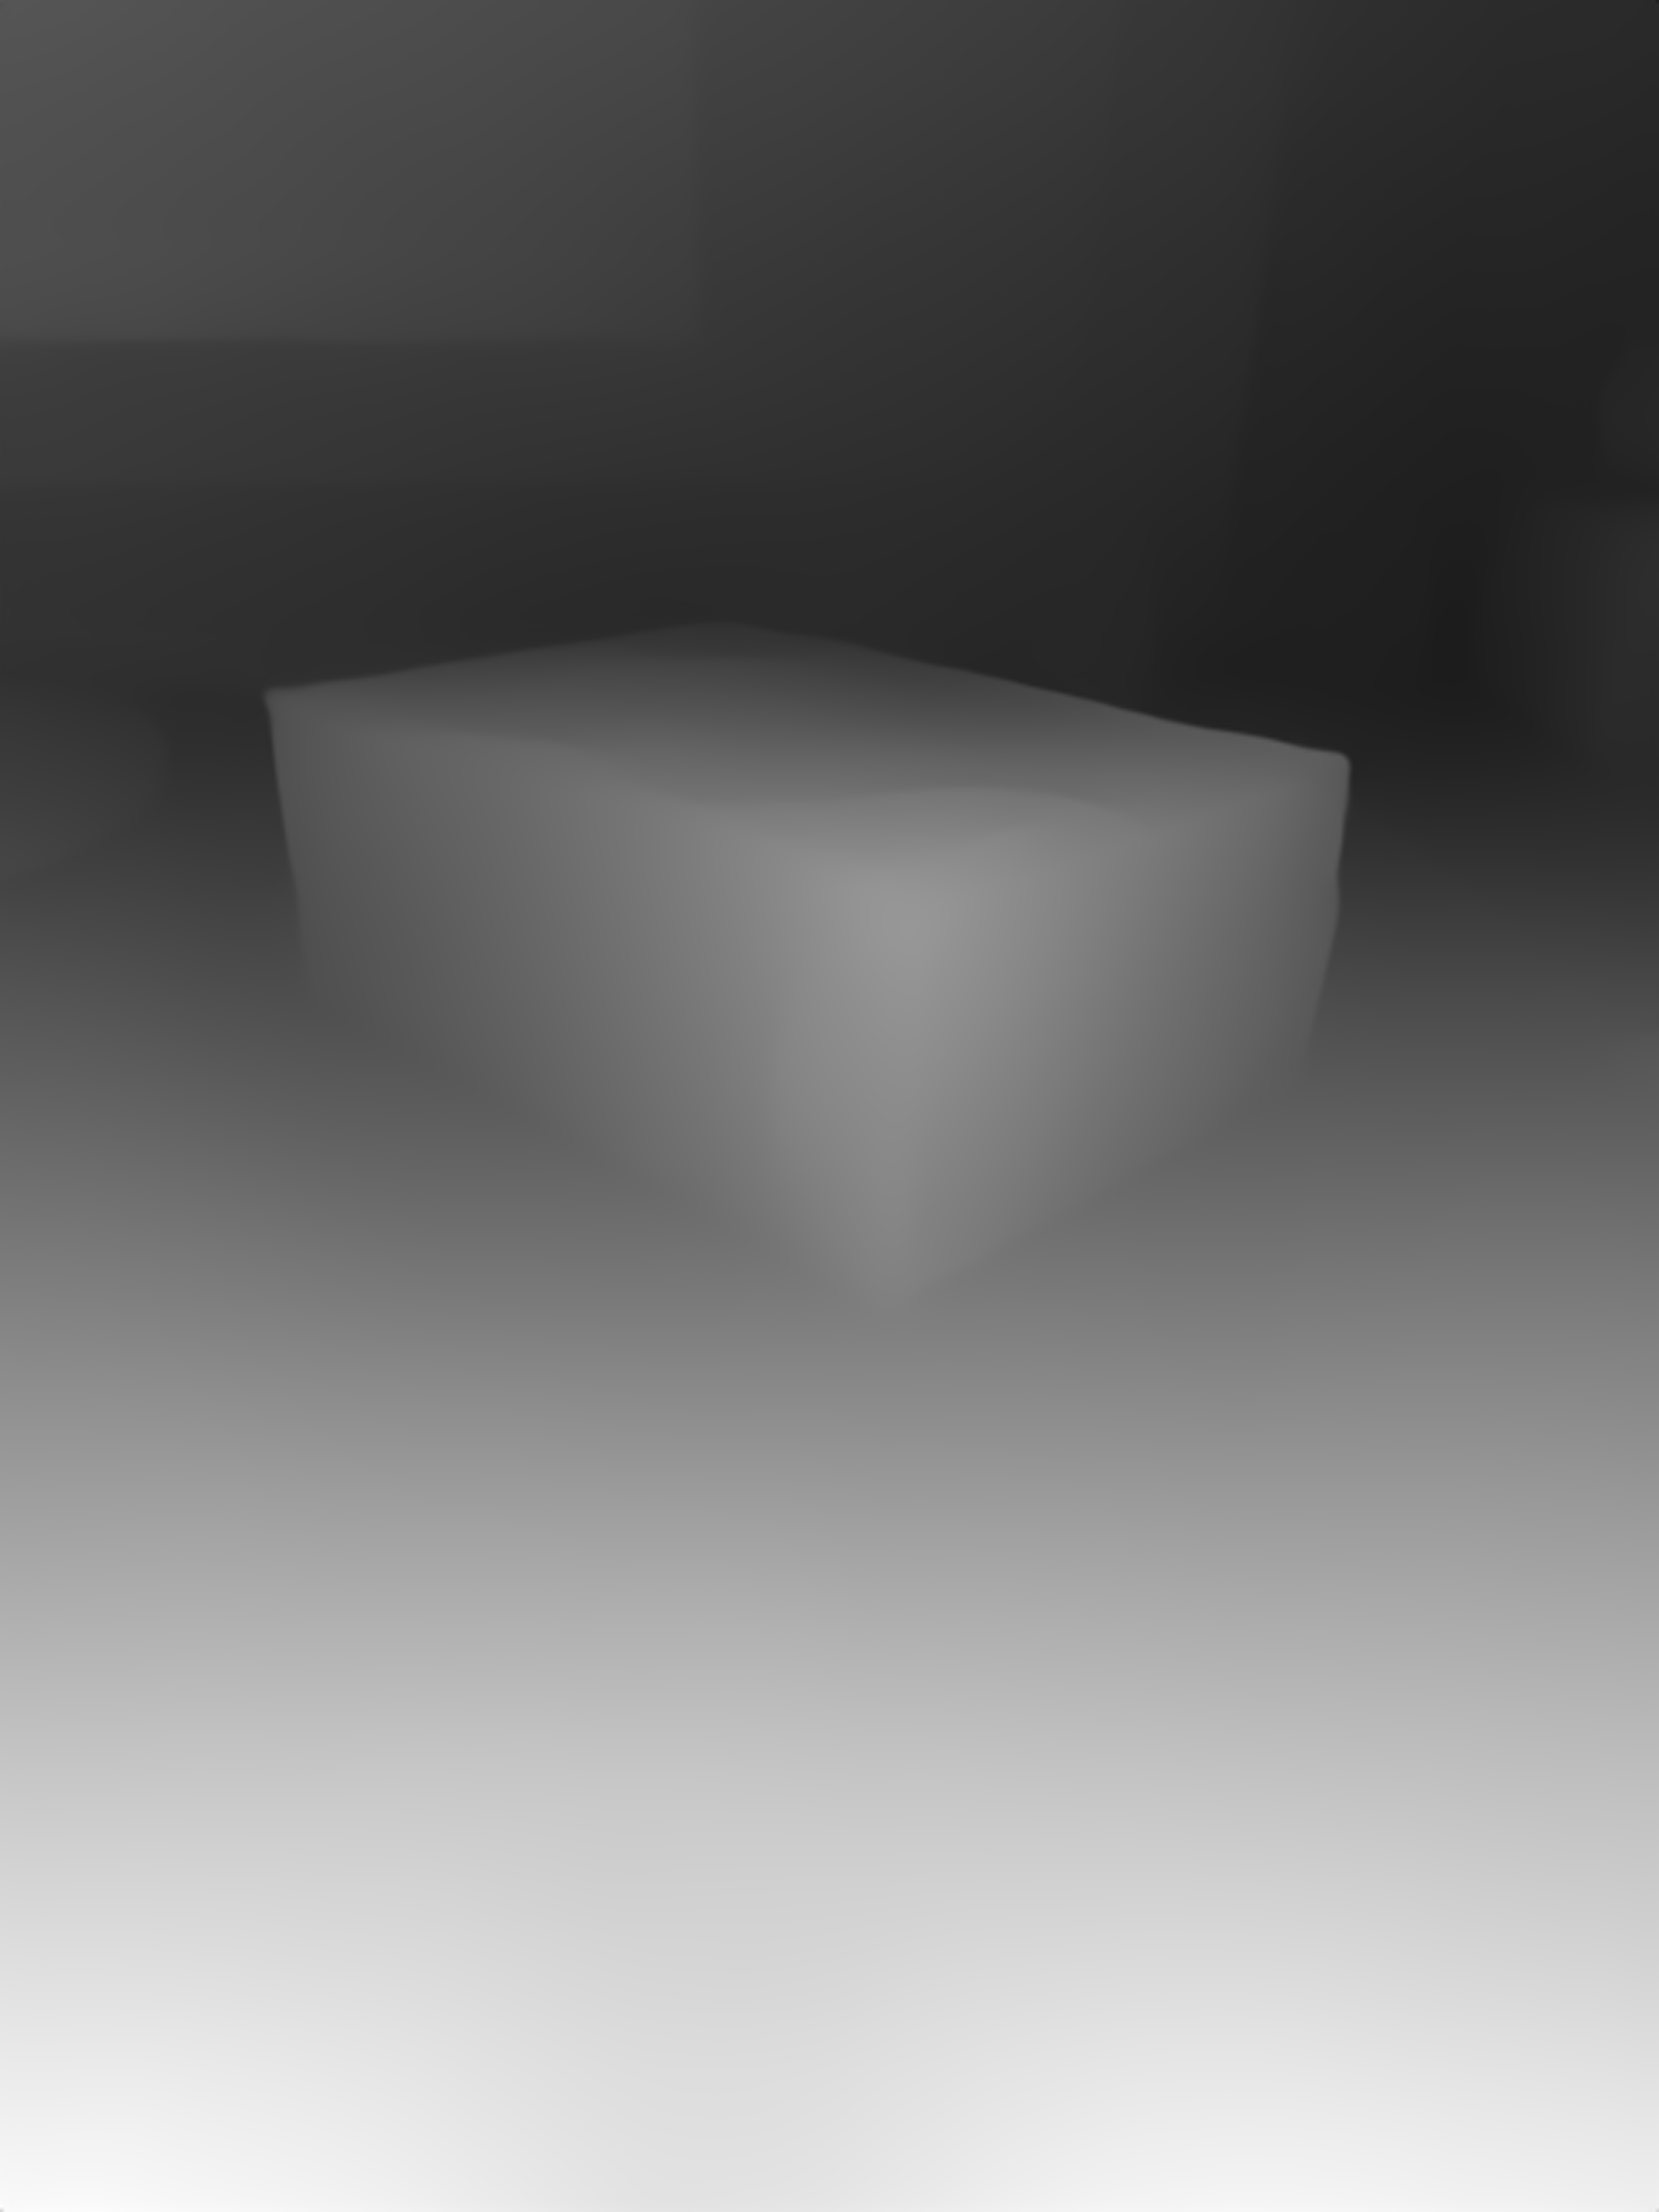

In [8]:
output["depth"]

In [10]:
predicted_depth = output["predicted_depth"]
predicted_depth

tensor([[[ 9.1264,  9.1324,  9.0718,  ...,  4.4677,  4.4915,  3.4682],
         [ 8.7464,  9.0087,  9.1014,  ...,  4.4197,  4.3696,  4.5090],
         [ 8.9903,  9.0749,  9.1255,  ...,  4.4556,  4.4412,  4.5372],
         ...,
         [26.9560, 26.7577, 26.7515,  ..., 25.5108, 25.4911, 25.4893],
         [26.7907, 26.7102, 26.7569,  ..., 25.4155, 25.6042, 25.6355],
         [23.4196, 26.4575, 26.8474,  ..., 25.2538, 25.6353, 23.5457]]])

In [21]:
len(predicted_depth[0][0])

518

In [23]:
predicted_depth[0][0][0]

tensor(9.1264)

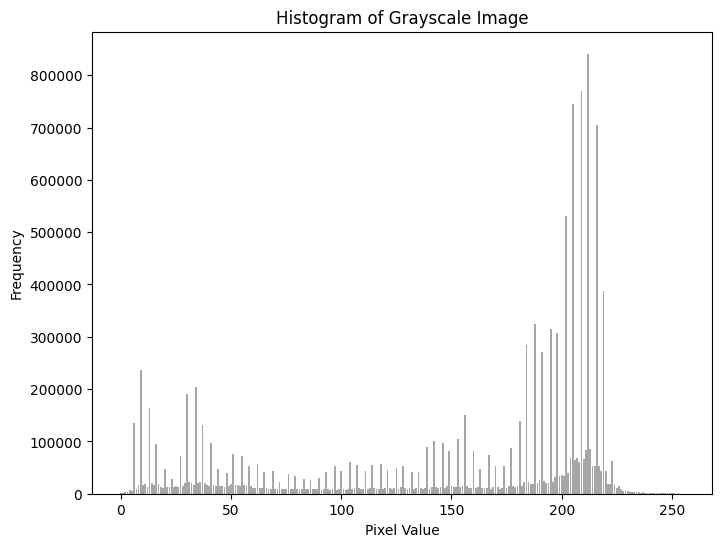

In [30]:
# Convert the image to grayscale mode if not already in grayscale
if image.mode != "L":
    image = image.convert("L")

# Create a histogram of the grayscale image
histogram = image.histogram()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(range(256), histogram, color='gray', alpha=0.7)
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [31]:
pipe_large = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-large-hf")
output = pipe_large(image)
output

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

{'predicted_depth': tensor([[[105.3000, 104.8728, 104.9306,  ...,  31.9870,  31.8210,  25.2269],
          [104.6376, 104.9567, 104.5086,  ...,  32.1366,  31.7964,  31.6805],
          [104.4467, 104.5522, 104.3571,  ...,  31.8490,  31.9337,  32.0226],
          ...,
          [320.5050, 321.2334, 320.8601,  ..., 310.0622, 310.0598, 310.5079],
          [322.9652, 321.2277, 322.0547,  ..., 311.2900, 311.4207, 312.7655],
          [278.5869, 322.2340, 323.5671,  ..., 312.1258, 314.2133, 284.4674]]]),
 'depth': <PIL.Image.Image image mode=L size=3024x4032>}

In [32]:
predicted_depth = output["predicted_depth"]
predicted_depth

tensor([[[105.3000, 104.8728, 104.9306,  ...,  31.9870,  31.8210,  25.2269],
         [104.6376, 104.9567, 104.5086,  ...,  32.1366,  31.7964,  31.6805],
         [104.4467, 104.5522, 104.3571,  ...,  31.8490,  31.9337,  32.0226],
         ...,
         [320.5050, 321.2334, 320.8601,  ..., 310.0622, 310.0598, 310.5079],
         [322.9652, 321.2277, 322.0547,  ..., 311.2900, 311.4207, 312.7655],
         [278.5869, 322.2340, 323.5671,  ..., 312.1258, 314.2133, 284.4674]]])

In [33]:
len(predicted_depth[0][0])

518

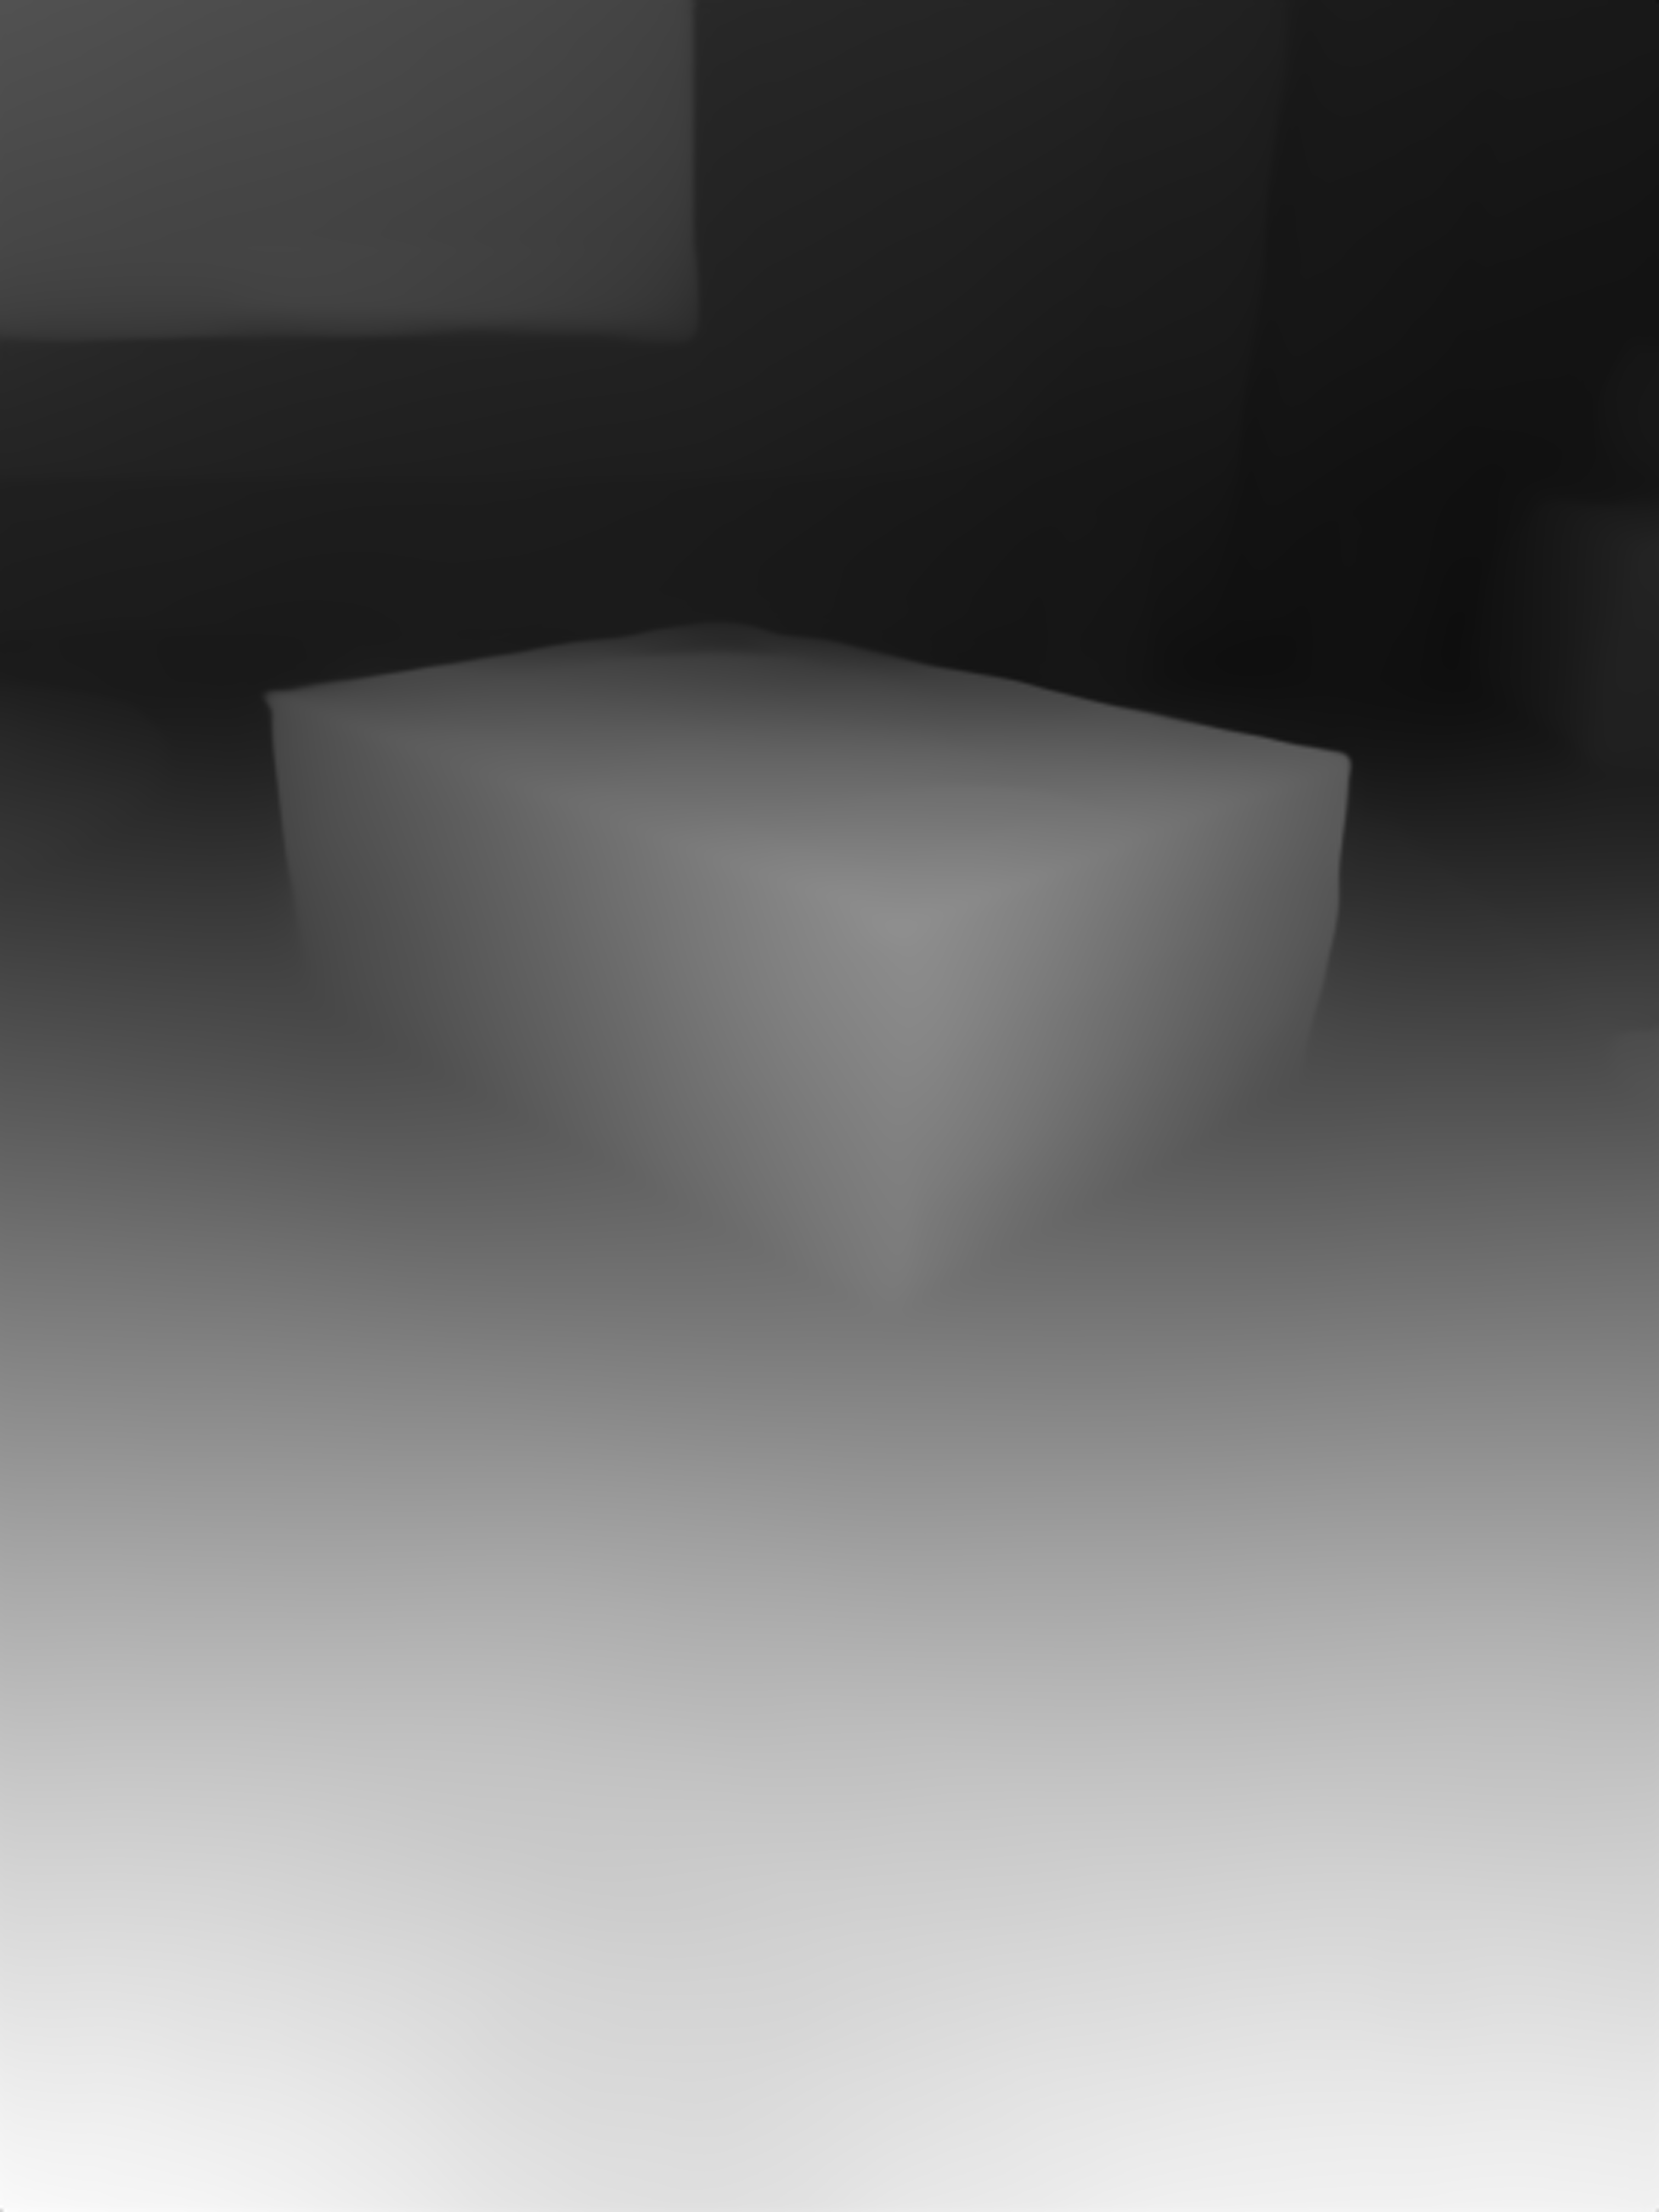

In [34]:
output["depth"]